In [1]:
import pandas as pd
import numpy as np
import mysql.connector as sql
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler , StandardScaler

from sklearn.linear_model import LogisticRegression

from sklearn.metrics import classification_report , confusion_matrix,accuracy_score,f1_score



import warnings
warnings.filterwarnings('ignore')

In [2]:
import getpass
sql_password = getpass.getpass('Enter password :')

Enter password :········


In [3]:
mydb = sql.connect(host = 'localhost',
                  user = 'root',
                  passwd = sql_password,  ## use your password
                  #use_pure = True,
                  database = 'loan_data')

print(mydb)

In [4]:
mycursor = mydb.cursor()

In [5]:
mycursor.execute('show databases')
for db in mycursor:
    print(db)

('aditya',)
('album',)
('db2',)
('information_schema',)
('loan_data',)
('myaditya',)
('mydatabase',)
('mysql',)
('new_schema',)
('performance_schema',)
('sql_hr',)
('sql_inventory',)
('sql_store',)
('sys',)
('test',)
('velocity_new',)
('world',)


In [7]:
mycursor.execute('SELECT * FROM loan_data.simple_loan_data')
result = mycursor.fetchall()
for row in result:
    print(row)


('LP001002', 'Male', 'No', 0, 'Graduate', 'No', 5849, 0, '', 360, 1, 'Urban', 'Y')
('LP001003', 'Male', 'Yes', 1, 'Graduate', 'No', 4583, 1508, '128', 360, 1, 'Rural', 'N')
('LP001005', 'Male', 'Yes', 0, 'Graduate', 'Yes', 3000, 0, '66', 360, 1, 'Urban', 'Y')
('LP001006', 'Male', 'Yes', 0, 'Not Graduate', 'No', 2583, 2358, '120', 360, 1, 'Urban', 'Y')
('LP001008', 'Male', 'No', 0, 'Graduate', 'No', 6000, 0, '141', 360, 1, 'Urban', 'Y')
('LP001011', 'Male', 'Yes', 2, 'Graduate', 'Yes', 5417, 4196, '267', 360, 1, 'Urban', 'Y')
('LP001013', 'Male', 'Yes', 0, 'Not Graduate', 'No', 2333, 1516, '95', 360, 1, 'Urban', 'Y')
('LP001018', 'Male', 'Yes', 2, 'Graduate', 'No', 4006, 1526, '168', 360, 1, 'Urban', 'Y')
('LP001020', 'Male', 'Yes', 1, 'Graduate', 'No', 12841, 10968, '349', 360, 1, 'Semiurban', 'N')
('LP001024', 'Male', 'Yes', 2, 'Graduate', 'No', 3200, 700, '70', 360, 1, 'Urban', 'Y')
('LP001027', 'Male', 'Yes', 2, 'Graduate', '', 2500, 1840, '109', 360, 1, 'Urban', 'Y')
('LP001028', '

In [8]:
df = pd.DataFrame(result)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,LP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,LP002974,Male,Yes,0,Graduate,No,3232,1950,108,360,1,Rural,Y
559,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
560,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
561,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [9]:
mycursor.execute('DESCRIBE loan_data.simple_loan_data')
result1 = mycursor.fetchall()
print(result1)

[('Loan_ID', b'text', 'YES', '', None, ''), ('Gender', b'text', 'YES', '', None, ''), ('Married', b'text', 'YES', '', None, ''), ('Dependents', b'int', 'YES', '', None, ''), ('Education', b'text', 'YES', '', None, ''), ('Self_Employed', b'text', 'YES', '', None, ''), ('ApplicantIncome', b'int', 'YES', '', None, ''), ('CoapplicantIncome', b'int', 'YES', '', None, ''), ('LoanAmount', b'text', 'YES', '', None, ''), ('Loan_Amount_Term', b'int', 'YES', '', None, ''), ('Credit_History', b'int', 'YES', '', None, ''), ('Property_Area', b'text', 'YES', '', None, ''), ('Loan_Status', b'text', 'YES', '', None, '')]


In [10]:
column_list = []
for column in result1:
    column_list.append(column[0])
print(column_list)

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [11]:
df = pd.DataFrame(result,columns=column_list)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0,,360,1,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508,128,360,1,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0,66,360,1,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358,120,360,1,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0,141,360,1,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
558,LP002974,Male,Yes,0,Graduate,No,3232,1950,108,360,1,Rural,Y
559,LP002978,Female,No,0,Graduate,No,2900,0,71,360,1,Rural,Y
560,LP002983,Male,Yes,1,Graduate,No,8072,240,253,360,1,Urban,Y
561,LP002984,Male,Yes,2,Graduate,No,7583,0,187,360,1,Urban,Y


In [ ]:
DATA:
    1. client database
    2. company database
    3. web scrapping
    
Data was not in good format

In [6]:
df = pd.read_csv('simple_loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [13]:
# df.dropna(inplace = True)

In [ ]:
EDA:
    Business insights
    detecting null values 
    detecting outliers
        1. detect using IQR method
        2. z-score
        3. scatterplot
        
at the end of EDA you will have a conclusion
    

In [15]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
percentage_missing = df.isna().sum()*100/len(df)
percentage_missing

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [8]:
missing_value_df = pd.DataFrame({'column_name':df.columns,
                                'percentage_missing':percentage_missing,
                                'no_of_missing_values':df.isna().sum()})

In [9]:
missing_value_df.sort_values(by = 'percentage_missing')

,column_name,percentage_missing,no_of_missing_values
Loan_ID,Loan_ID,0.000000,0
Education,Education,0.000000,0
ApplicantIncome,ApplicantIncome,0.000000,0
CoapplicantIncome,CoapplicantIncome,0.000000,0
Property_Area,Property_Area,0.000000,0
Loan_Status,Loan_Status,0.000000,0
Married,Married,0.488599,3
Gender,Gender,2.117264,13
Loan_Amount_Term,Loan_Amount_Term,2.280130,14
Dependents,Dependents,2.442997,15


In [20]:
missing_value_df.sort_values(by = 'percentage_missing',ascending=False)

,column_name,percentage_missing,no_of_missing_values
Credit_History,Credit_History,8.143322,50
Self_Employed,Self_Employed,5.211726,32
LoanAmount,LoanAmount,3.583062,22
Dependents,Dependents,2.442997,15
Loan_Amount_Term,Loan_Amount_Term,2.280130,14
Gender,Gender,2.117264,13
Married,Married,0.488599,3
Loan_ID,Loan_ID,0.000000,0
Education,Education,0.000000,0
ApplicantIncome,ApplicantIncome,0.000000,0


In [21]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [22]:
new_df = df.sort_values(by = 'Loan_Status')

In [23]:
new_df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N
489,LP002556,Male,No,0,Graduate,No,2435,0.0,75.0,360.0,1.0,Urban,N
186,LP001641,Male,Yes,1,Graduate,Yes,2178,0.0,66.0,300.0,0.0,Rural,N
487,LP002547,Male,Yes,1,Graduate,No,18333,0.0,500.0,360.0,1.0,Urban,N
486,LP002545,Male,No,2,Graduate,No,3547,0.0,80.0,360.0,0.0,Rural,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
237,LP001788,Female,No,0,Graduate,Yes,3463,0.0,122.0,360.0,NaN,Urban,Y
235,LP001784,Male,Yes,1,Graduate,No,5500,1260.0,170.0,360.0,1.0,Rural,Y
234,LP001778,Male,Yes,1,Graduate,No,3155,1779.0,140.0,360.0,1.0,Semiurban,Y
252,LP001841,Male,No,0,Not Graduate,Yes,2583,2167.0,104.0,360.0,1.0,Rural,Y


<AxesSubplot:>

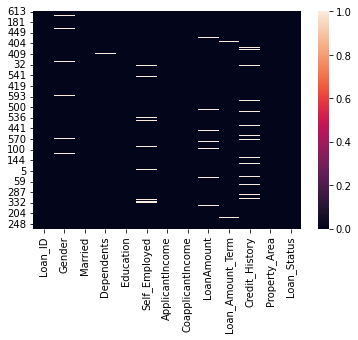

In [24]:
sns.heatmap(new_df.isna())

In [25]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [26]:
categorical_cols = [ 'Gender', 'Married', 'Education',
       'Self_Employed',   'Credit_History', 'Property_Area', 'Loan_Status']

In [27]:
df['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [29]:
for col in categorical_cols:
    print(f'value_cunts of {col.upper()} :')
    print(df[col].value_counts())
    print()

value_cunts of GENDER :
Male      489
Female    112
Name: Gender, dtype: int64

value_cunts of MARRIED :
Yes    398
No     213
Name: Married, dtype: int64

value_cunts of EDUCATION :
Graduate        480
Not Graduate    134
Name: Education, dtype: int64

value_cunts of SELF_EMPLOYED :
No     500
Yes     82
Name: Self_Employed, dtype: int64

value_cunts of CREDIT_HISTORY :
1.0    475
0.0     89
Name: Credit_History, dtype: int64

value_cunts of PROPERTY_AREA :
Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

value_cunts of LOAN_STATUS :
Y    422
N    192
Name: Loan_Status, dtype: int64



In [30]:
for col in categorical_cols:
    print(f'value_cunts of {col.upper()} :')
    print(df[col].unique())
    print()

value_cunts of GENDER :
['Male' 'Female' nan]

value_cunts of MARRIED :
['No' 'Yes' nan]

value_cunts of EDUCATION :
['Graduate' 'Not Graduate']

value_cunts of SELF_EMPLOYED :
['No' 'Yes' nan]

value_cunts of CREDIT_HISTORY :
[ 1.  0. nan]

value_cunts of PROPERTY_AREA :
['Urban' 'Rural' 'Semiurban']

value_cunts of LOAN_STATUS :
['Y' 'N']



In [31]:
for col in categorical_cols:
    print(f'value_cunts of {col.upper()} :')
    print(df[col].nunique())
    print()

value_cunts of GENDER :
2

value_cunts of MARRIED :
2

value_cunts of EDUCATION :
2

value_cunts of SELF_EMPLOYED :
2

value_cunts of CREDIT_HISTORY :
2

value_cunts of PROPERTY_AREA :
3

value_cunts of LOAN_STATUS :
2



## Handling null values

In [10]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
missing_value_df

,column_name,percentage_missing,no_of_missing_values
Loan_ID,Loan_ID,0.000000,0
Gender,Gender,2.117264,13
Married,Married,0.488599,3
Dependents,Dependents,2.442997,15
Education,Education,0.000000,0
Self_Employed,Self_Employed,5.211726,32
ApplicantIncome,ApplicantIncome,0.000000,0
CoapplicantIncome,CoapplicantIncome,0.000000,0
LoanAmount,LoanAmount,3.583062,22
Loan_Amount_Term,Loan_Amount_Term,2.280130,14


In [12]:
df['Gender'].mode()[0]

'Male'

In [13]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace = True)

In [14]:
df['Married'].fillna(df['Married'].mode()[0],inplace = True)

In [15]:
df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [16]:
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace = True)

In [17]:
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace = True)

In [18]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [19]:
df.groupby('Loan_Status').get_group('N')['LoanAmount'].mean()

151.22099447513813

In [20]:
mean_N = df.groupby('Loan_Status').get_group('N')['LoanAmount'].mean()

In [21]:
df.groupby('Loan_Status').get_group('Y')['LoanAmount'].mean()

144.29440389294405

In [22]:
mean_Y = df.groupby('Loan_Status').get_group('Y')['LoanAmount'].mean()

In [23]:
df.groupby('Loan_Status').get_group('N')['LoanAmount'].fillna(mean_N,inplace=True)

In [24]:
df.loc[df['Loan_Status']=='N','LoanAmount'] = df.loc[df['Loan_Status']=='N','LoanAmount'].fillna(mean_N)

In [25]:
df.groupby('Loan_Status').get_group('N')['LoanAmount'].isna().sum()

0

In [26]:
df.loc[df['Loan_Status']=='Y','LoanAmount'] = df.loc[df['Loan_Status']=='Y','LoanAmount'].fillna(mean_Y)

In [27]:
df['LoanAmount'].isna().sum()

0

In [28]:
df.isna().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [29]:
df['Loan_Amount_Term'].nunique()

10

In [30]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace = True)

In [31]:
df['Credit_History'].nunique()

2

In [32]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace = True)

In [33]:
df.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

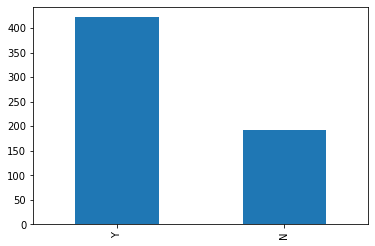

In [34]:
df['Loan_Status'].value_counts().plot.bar()

<AxesSubplot:>

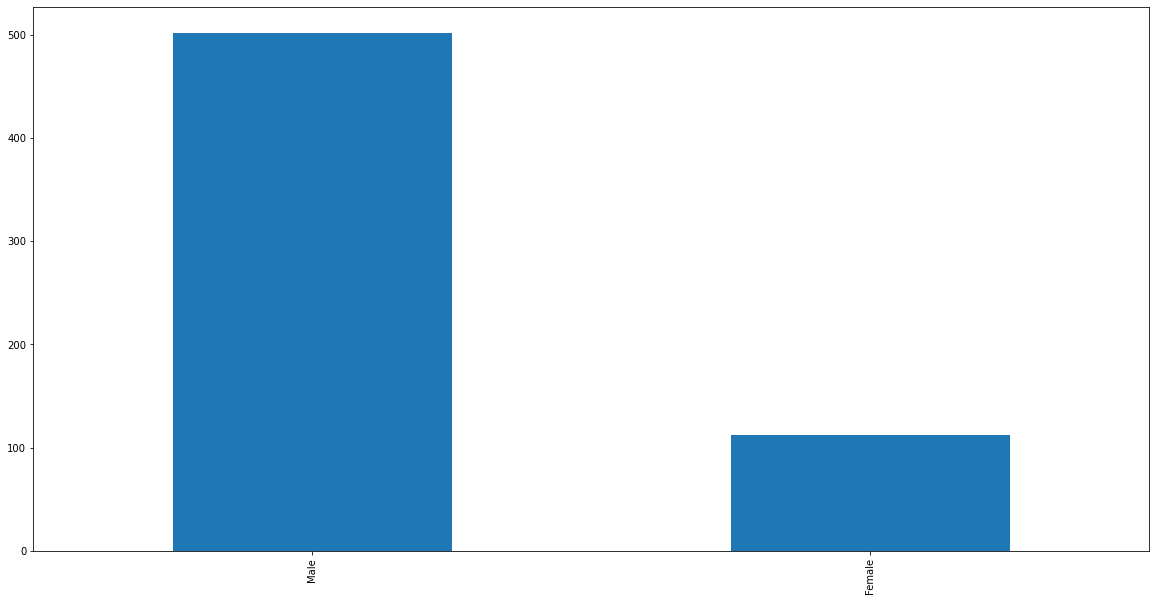

In [35]:
df['Gender'].value_counts().plot.bar(figsize = (20,10))

<AxesSubplot:title={'center':'Gender'}>

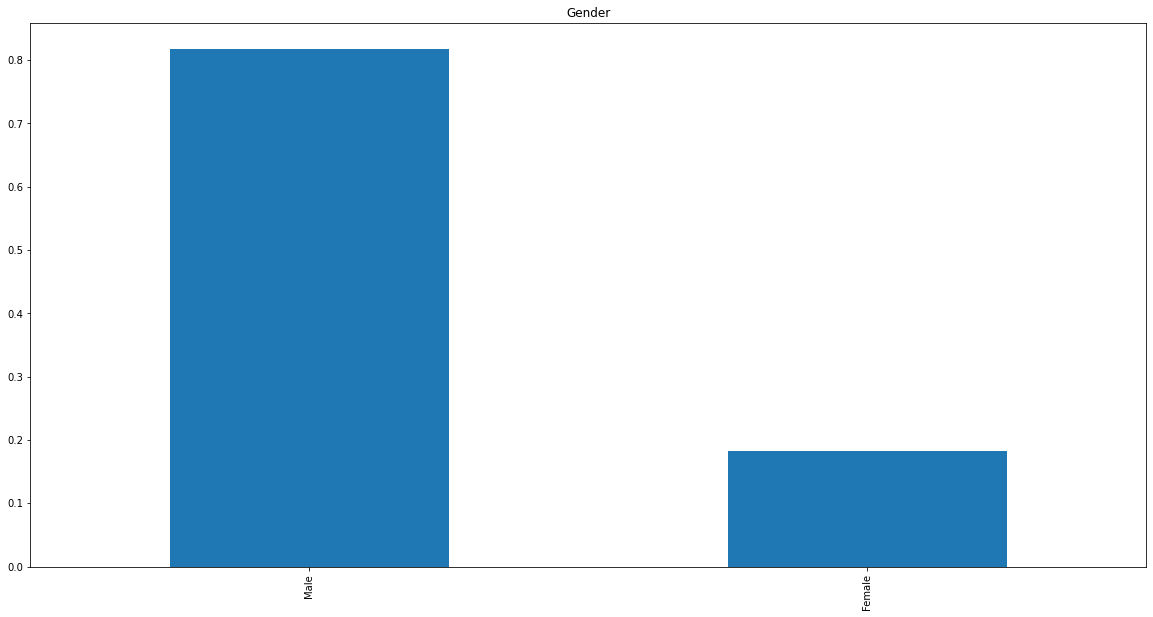

In [36]:
df['Gender'].value_counts(normalize=True).plot.bar(figsize = (20,10),title = 'Gender')

<AxesSubplot:xlabel='Gender'>

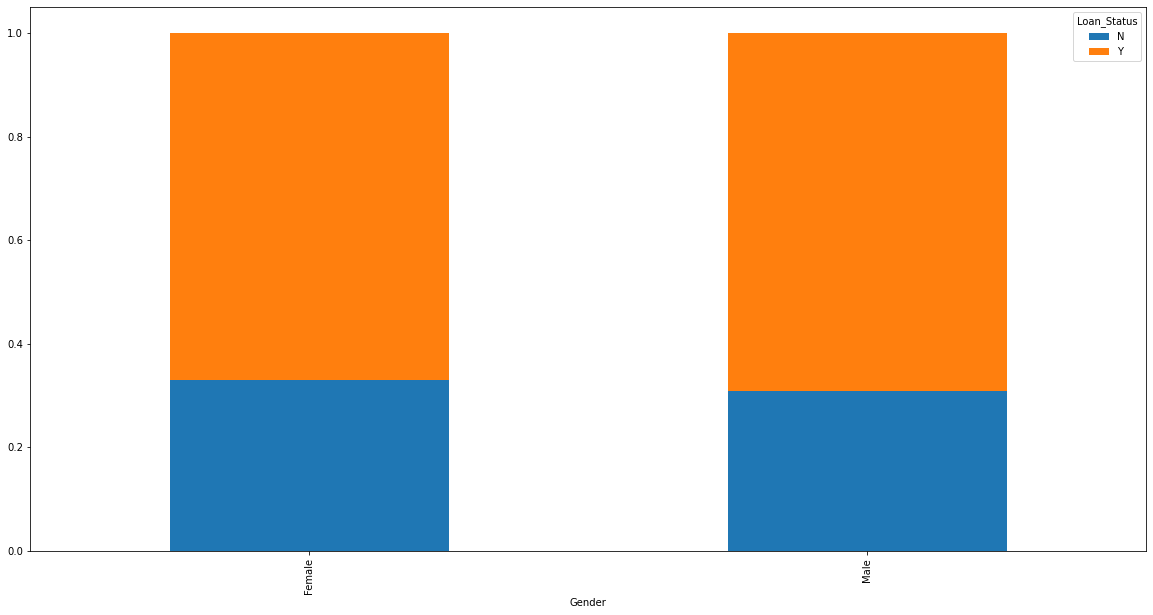

In [37]:
gender = pd.crosstab(df['Gender'],df['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(20,10))

<AxesSubplot:xlabel='Dependents'>

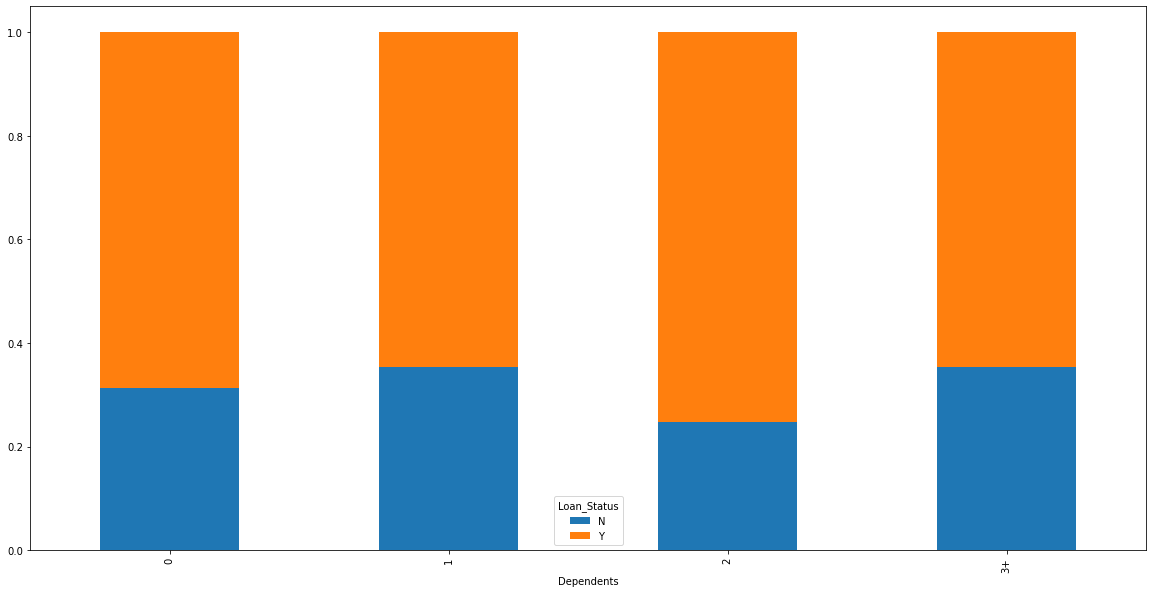

In [38]:
gender = pd.crosstab(df['Dependents'],df['Loan_Status'])
gender.div(gender.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(20,10))

<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

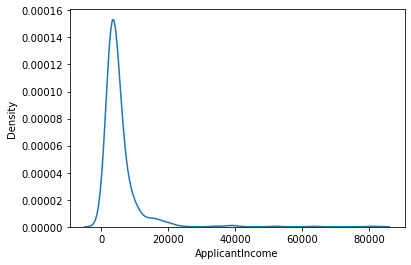

In [81]:
sns.kdeplot(x=df['ApplicantIncome'])

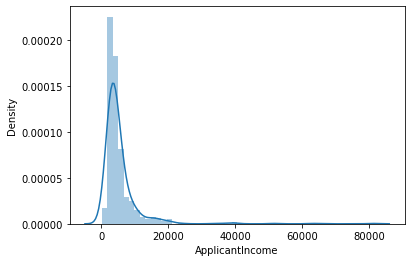

In [82]:
import seaborn as sns
sns.distplot(df['ApplicantIncome'])
plt.show()

<AxesSubplot:>

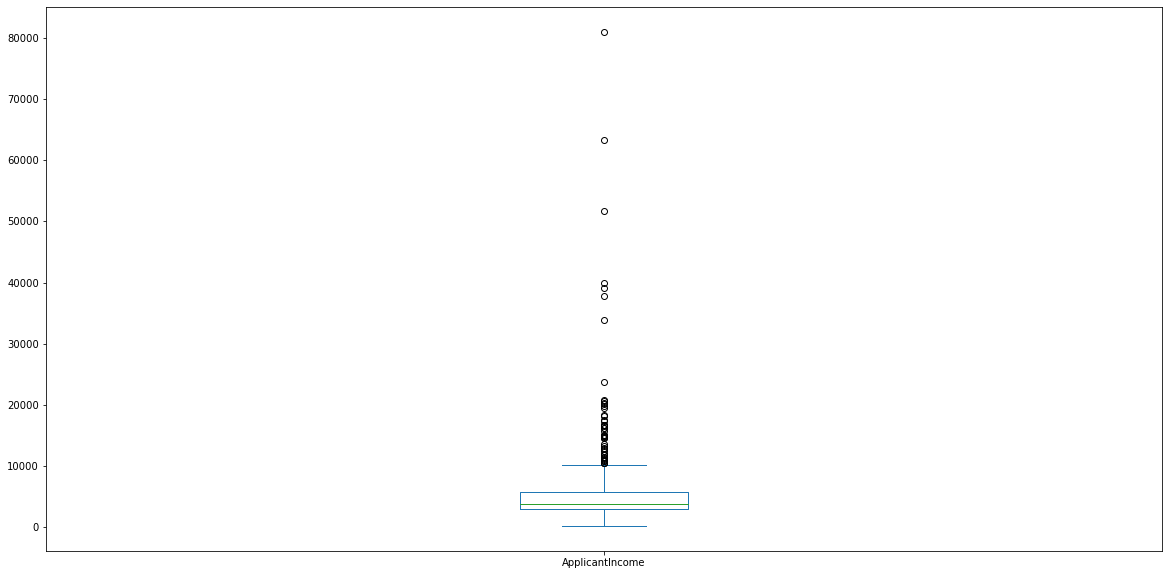

In [83]:
df['ApplicantIncome'].plot.box(figsize=(20,10))

## Encoding Variables

In [39]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [41]:
df['Gender'].value_counts().to_dict()

{'Male': 502, 'Female': 112}

In [42]:
df['Gender'].replace({'Male': 1, 'Female': 0},inplace=True)

In [43]:
df['Married'].value_counts().to_dict()

{'Yes': 401, 'No': 213}

In [44]:
df['Married'].replace({'Yes': 1, 'No': 0},inplace=True)

In [45]:
df['Dependents'].value_counts().to_dict()

{'0': 360, '1': 102, '2': 101, '3+': 51}

In [46]:
df['Dependents'].replace({'0': 0, '1': 1, '2': 2, '3+': 3},inplace=True)

In [47]:
df['Education'].value_counts().to_dict()

{'Graduate': 480, 'Not Graduate': 134}

In [48]:
df['Education'].replace({'Graduate': 1, 'Not Graduate': 0},inplace=True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(5), object(4)
memory usage: 62.5+ KB


In [50]:
df['Self_Employed'].value_counts().to_dict()

{'No': 532, 'Yes': 82}

In [51]:
df['Self_Employed'].replace({'No': 0, 'Yes': 1},inplace=True)

In [52]:
df['Property_Area'].value_counts().to_dict()

{'Semiurban': 233, 'Urban': 202, 'Rural': 179}

In [53]:
df['Property_Area'].replace({'Semiurban': 1, 'Urban': 2, 'Rural': 0},inplace=True)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    int64  
 2   Married            614 non-null    int64  
 3   Dependents         614 non-null    int64  
 4   Education          614 non-null    int64  
 5   Self_Employed      614 non-null    int64  
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    int64  
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(7), object(2)
memory usage: 62.5+ KB


## Train Test split 

In [55]:
x = df.drop(['Loan_ID','Loan_Status'],axis = 1)
y = df['Loan_Status']

In [56]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2 , random_state=45,stratify=y)

In [57]:
x_train.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

## Train Logistic Regression

In [58]:
log_clf = LogisticRegression()
log_clf.fit(x_train,y_train)

LogisticRegression()

## Evaluation

In [59]:
## testing data evaluation
y_pred_log = log_clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_log)
print('confusion Matrix :\n',cnf_matrix)
print()

acc_score_LR_test = accuracy_score(y_test,y_pred_log)
print('Accuracy score :',acc_score_LR_test)
print()

clf_report = classification_report(y_test,y_pred_log)
print('classification_report',clf_report)


confusion Matrix :
 [[17 21]
 [ 0 85]]

Accuracy score : 0.8292682926829268

classification_report               precision    recall  f1-score   support

           N       1.00      0.45      0.62        38
           Y       0.80      1.00      0.89        85

    accuracy                           0.83       123
   macro avg       0.90      0.72      0.75       123
weighted avg       0.86      0.83      0.81       123



In [60]:
## Training data evaluation
y_pred_train_log = log_clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_log)
print('confusion Matrix :\n',cnf_matrix)
print()

acc_score_LR_test = accuracy_score(y_train,y_pred_train_log)
print('Accuracy score :',acc_score_LR_test)
print()

clf_report = classification_report(y_train,y_pred_train_log)
print('classification_report',clf_report)


confusion Matrix :
 [[ 65  89]
 [  8 329]]

Accuracy score : 0.8024439918533605

classification_report               precision    recall  f1-score   support

           N       0.89      0.42      0.57       154
           Y       0.79      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.84      0.70      0.72       491
weighted avg       0.82      0.80      0.78       491



## K- nearest Neighbor

In [61]:
from sklearn.neighbors import KNeighborsClassifier

In [62]:
from sklearn.preprocessing import MinMaxScaler , StandardScaler

In [64]:
std_scaler = StandardScaler()
std_scaler.fit(x_train)

StandardScaler()

In [66]:
x_train_std = std_scaler.fit_transform(x_train)

In [67]:
x_test_std = std_scaler.transform(x_test)

In [72]:
# len(x_test_std)

In [71]:
knn_model = KNeighborsClassifier()
knn_model.fit(x_train_std,y_train)

KNeighborsClassifier()

In [73]:
## testing data evaluation
y_pred_knn = knn_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_knn)
print('confusion Matrix :\n',cnf_matrix)
print()

acc_score__test_knn = accuracy_score(y_test,y_pred_knn)
print('Accuracy score :',acc_score__test_knn)
print()

clf_report = classification_report(y_test,y_pred_knn)
print('classification_report',clf_report)

confusion Matrix :
 [[ 0 38]
 [ 0 85]]

Accuracy score : 0.6910569105691057

classification_report               precision    recall  f1-score   support

           N       0.00      0.00      0.00        38
           Y       0.69      1.00      0.82        85

    accuracy                           0.69       123
   macro avg       0.35      0.50      0.41       123
weighted avg       0.48      0.69      0.56       123



In [74]:
## Training data evaluation
y_pred_train_knn = knn_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_knn)
print('confusion Matrix :\n',cnf_matrix)
print()

acc_score_knn_train = accuracy_score(y_train,y_pred_train_knn)
print('Accuracy score :',acc_score_knn_train)
print()

clf_report = classification_report(y_train,y_pred_train_knn)
print('classification_report',clf_report)


confusion Matrix :
 [[  0 154]
 [  0 337]]

Accuracy score : 0.6863543788187373

classification_report               precision    recall  f1-score   support

           N       0.00      0.00      0.00       154
           Y       0.69      1.00      0.81       337

    accuracy                           0.69       491
   macro avg       0.34      0.50      0.41       491
weighted avg       0.47      0.69      0.56       491



## Decision Tree

In [75]:
from sklearn.tree import DecisionTreeClassifier

In [76]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train,y_train)

DecisionTreeClassifier()

In [77]:
## testing data evaluation
y_pred_dt = dt_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_dt)
print('confusion Matrix :\n',cnf_matrix)
print()

acc_score__test_dt = accuracy_score(y_test,y_pred_dt)
print('Accuracy score :',acc_score__test_dt)
print()

clf_report = classification_report(y_test,y_pred_dt)
print('classification_report',clf_report)

confusion Matrix :
 [[22 16]
 [21 64]]

Accuracy score : 0.6991869918699187

classification_report               precision    recall  f1-score   support

           N       0.51      0.58      0.54        38
           Y       0.80      0.75      0.78        85

    accuracy                           0.70       123
   macro avg       0.66      0.67      0.66       123
weighted avg       0.71      0.70      0.70       123



In [78]:
## Training data evaluation
y_pred_train_dt = dt_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_dt)
print('confusion Matrix :\n',cnf_matrix)
print()

acc_score_dt_train = accuracy_score(y_train,y_pred_train_dt)
print('Accuracy score :',acc_score_dt_train)
print()

clf_report = classification_report(y_train,y_pred_train_dt)
print('classification_report',clf_report)

confusion Matrix :
 [[154   0]
 [  0 337]]

Accuracy score : 1.0

classification_report               precision    recall  f1-score   support

           N       1.00      1.00      1.00       154
           Y       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [80]:
dt_model = DecisionTreeClassifier()

hyp = {'criterion':['gini','entropy'],
      'max_depth':np.arange(2,10),
      'min_samples_split':np.arange(2,10),
      'min_samples_leaf':np.arange(2,10)
      }

In [81]:
from sklearn.model_selection import train_test_split , GridSearchCV , RandomizedSearchCV

In [82]:
rscv_model = RandomizedSearchCV(dt_model,hyp,random_state=10,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])},
                   random_state=10)

In [84]:
rscv_model.best_params_

{'min_samples_split': 9,
 'min_samples_leaf': 3,
 'max_depth': 2,
 'criterion': 'entropy'}

###  tuned DT model

In [85]:
rscv_model.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=2, min_samples_leaf=3,
                       min_samples_split=9)

In [86]:
## testing data evaluation
y_pred_dt = rscv_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_dt)
print('confusion Matrix :\n',cnf_matrix)
print()

acc_score__test_dt = accuracy_score(y_test,y_pred_dt)
print('Accuracy score :',acc_score__test_dt)
print()

clf_report = classification_report(y_test,y_pred_dt)
print('classification_report',clf_report)

confusion Matrix :
 [[17 21]
 [ 0 85]]

Accuracy score : 0.8292682926829268

classification_report               precision    recall  f1-score   support

           N       1.00      0.45      0.62        38
           Y       0.80      1.00      0.89        85

    accuracy                           0.83       123
   macro avg       0.90      0.72      0.75       123
weighted avg       0.86      0.83      0.81       123



In [87]:
## Training data evaluation
y_pred_train_dt = rscv_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_dt)
print('confusion Matrix :\n',cnf_matrix)
print()

acc_score_dt_train = accuracy_score(y_train,y_pred_train_dt)
print('Accuracy score :',acc_score_dt_train)
print()

clf_report = classification_report(y_train,y_pred_train_dt)
print('classification_report',clf_report)

confusion Matrix :
 [[ 65  89]
 [  7 330]]

Accuracy score : 0.8044806517311609

classification_report               precision    recall  f1-score   support

           N       0.90      0.42      0.58       154
           Y       0.79      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.70      0.72       491
weighted avg       0.82      0.80      0.78       491



## Random Forest

In [ ]:
Ensemble bagging Technique

In [89]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rf_model = RandomForestClassifier()

rf_model.fit(x_train,y_train)

RandomForestClassifier()

In [93]:
## testing data evaluation
y_pred_rf = rf_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_rf)
print('confusion Matrix :\n',cnf_matrix)
print()

acc_score__test_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy score :',acc_score__test_rf)
print()

clf_report = classification_report(y_test,y_pred_rf)
print('classification_report',clf_report)

confusion Matrix :
 [[18 20]
 [ 7 78]]

Accuracy score : 0.7804878048780488

classification_report               precision    recall  f1-score   support

           N       0.72      0.47      0.57        38
           Y       0.80      0.92      0.85        85

    accuracy                           0.78       123
   macro avg       0.76      0.70      0.71       123
weighted avg       0.77      0.78      0.77       123



In [94]:
## Training data evaluation
y_pred_train_rf = rf_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_rf)
print('confusion Matrix :\n',cnf_matrix)
print()

acc_score_rf_train = accuracy_score(y_train,y_pred_train_rf)
print('Accuracy score :',acc_score_rf_train)
print()

clf_report = classification_report(y_train,y_pred_train_rf)
print('classification_report',clf_report)

confusion Matrix :
 [[154   0]
 [  0 337]]

Accuracy score : 1.0

classification_report               precision    recall  f1-score   support

           N       1.00      1.00      1.00       154
           Y       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



In [100]:
rf_model =RandomForestClassifier()

hyp = {'criterion':['gini','entropy'],
      'max_depth':np.arange(2,10),
      'min_samples_split':np.arange(2,10),
      'min_samples_leaf':np.arange(2,10),
       'n_estimators':np.arange(60,150)
      }

rscv_model = RandomizedSearchCV(rf_model,hyp,random_state=10,cv=5)
rscv_model.fit(x_train,y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,  72,
        73,  74,  75,  76,  77,  78,  79,  80,  81,  82,  83,  84,  85,
        86,  87,  88,  89,  90,  91,  92,  93,  94,  95,  96,  97,  98,
        99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111,
       112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124,
       125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137,
       138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149])},
                   random_state=10

In [101]:
rscv_model.best_estimator_

RandomForestClassifier(max_depth=3, min_samples_leaf=7, n_estimators=72)

### tuned RF model

In [ ]:

rscv_model = RandomizedSearchCV(rf_model,hyp,random_state=10,cv=5)
rscv_model.fit(x_train,y_train)

In [102]:
## testing data evaluation
y_pred_rf = rscv_model.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred_rf)
print('confusion Matrix :\n',cnf_matrix)
print()

acc_score__test_rf = accuracy_score(y_test,y_pred_rf)
print('Accuracy score :',acc_score__test_rf)
print()

clf_report = classification_report(y_test,y_pred_rf)
print('classification_report',clf_report)

confusion Matrix :
 [[17 21]
 [ 0 85]]

Accuracy score : 0.8292682926829268

classification_report               precision    recall  f1-score   support

           N       1.00      0.45      0.62        38
           Y       0.80      1.00      0.89        85

    accuracy                           0.83       123
   macro avg       0.90      0.72      0.75       123
weighted avg       0.86      0.83      0.81       123



In [103]:
## Training data evaluation
y_pred_train_rf = rscv_model.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train_rf)
print('confusion Matrix :\n',cnf_matrix)
print()

acc_score_rf_train = accuracy_score(y_train,y_pred_train_rf)
print('Accuracy score :',acc_score_rf_train)
print()

clf_report = classification_report(y_train,y_pred_train_rf)
print('classification_report',clf_report)

confusion Matrix :
 [[ 65  89]
 [  7 330]]

Accuracy score : 0.8044806517311609

classification_report               precision    recall  f1-score   support

           N       0.90      0.42      0.58       154
           Y       0.79      0.98      0.87       337

    accuracy                           0.80       491
   macro avg       0.85      0.70      0.72       491
weighted avg       0.82      0.80      0.78       491



In [104]:
print('acc_score_LR :',acc_score_LR_test,'acc_score_knn :',acc_score__test_knn,'acc_score_dt :',acc_score__test_dt,'acc_score_rf :',acc_score__test_rf,sep='\n')

acc_score_LR :
0.8024439918533605
acc_score_knn :
0.6910569105691057
acc_score_dt :
0.8292682926829268
acc_score_rf :
0.8292682926829268


In [ ]:
acc_score_rf :
0.8292682926829268

In [105]:
import pickle

In [111]:
pickle.dump(rscv_model,open('RF_model.pkl','wb'))

In [109]:
test_points = x_test[6:7]
test_points

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
48,0,1,0,1,0,2645,3440.0,120.0,360.0,0.0,2


In [112]:
rscv_model.predict(test_points)

array(['N'], dtype=object)